In [4]:
import pandas as pd

In [5]:
games = pd.read_csv('../data/games.csv', index_col='game_id')
train = pd.read_csv('../data/train.csv', index_col='game_id')
turns = pd.read_csv('../data/turns.csv', index_col='game_id')


In [6]:
games.drop(columns=["created_at"], inplace=True)

In [7]:
games_scores = pd.merge(games, train, on='game_id')
games_scores.dtypes

first                     object
time_control_name         object
game_end_reason           object
winner                     int64
lexicon                   object
initial_time_seconds       int64
increment_seconds          int64
rating_mode               object
max_overtime_minutes       int64
game_duration_seconds    float64
nickname                  object
score                      int64
rating                     int64
dtype: object

In [8]:
games_scores

,first,time_control_name,game_end_reason,winner,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,nickname,score,rating
game_id,,,,,,,,,,,,,
1,BetterBot,regular,STANDARD,1,NWL20,1200,0,CASUAL,1,674.844274,BetterBot,335,1637
1,BetterBot,regular,STANDARD,1,NWL20,1200,0,CASUAL,1,674.844274,stevy,429,1500
3,BetterBot,regular,STANDARD,1,CSW21,900,0,RATED,5,492.268262,davidavid,440,1811
3,BetterBot,regular,STANDARD,1,CSW21,900,0,RATED,5,492.268262,BetterBot,318,2071
4,BetterBot,regular,RESIGNED,0,CSW21,3600,0,CASUAL,1,350.861141,Inandoutworker,119,1473
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72771,HastyBot,regular,STANDARD,0,ECWL,900,0,CASUAL,10,236.133634,HastyBot,393,1614
72772,Gtowngrad,regular,STANDARD,0,NWL20,900,0,RATED,1,681.370077,BetterBot,442,1674
72772,Gtowngrad,regular,STANDARD,0,NWL20,900,0,RATED,1,681.370077,Gtowngrad,388,1364


In [9]:
games_scores.columns

Index(['first', 'time_control_name', 'game_end_reason', 'winner', 'lexicon',
       'initial_time_seconds', 'increment_seconds', 'rating_mode',
       'max_overtime_minutes', 'game_duration_seconds', 'nickname', 'score',
       'rating'],
      dtype='object')

In [10]:
games_scores.isna().any()

first                    False
time_control_name        False
game_end_reason          False
winner                   False
lexicon                  False
initial_time_seconds     False
increment_seconds        False
rating_mode              False
max_overtime_minutes     False
game_duration_seconds    False
nickname                 False
score                    False
rating                   False
dtype: bool

In [11]:
games_scores['initial_time_seconds'].value_counts().head()

1200    42156
900     24608
300      5956
3600     5888
1800     3526
Name: initial_time_seconds, dtype: int64

In [12]:
games_scores['increment_seconds'].value_counts()

0     98112
10     1088
1       870
5       368
60      200
7        90
3        68
15       14
59        8
30        2
Name: increment_seconds, dtype: int64

In [25]:
games_scores[games_scores['winner'] == -1]

,first,time_control_name,game_end_reason,winner,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,nickname,score,rating
game_id,,,,,,,,,,,,,
674,frs,regular,STANDARD,-1,NWL20,1200,0,RATED,2,1087.867688,frs,403,1755
674,frs,regular,STANDARD,-1,NWL20,1200,0,RATED,2,1087.867688,BetterBot,403,1625
1348,titan124,regular,STANDARD,-1,NWL20,1200,0,RATED,1,242.643385,BetterBot,357,1665
1348,titan124,regular,STANDARD,-1,NWL20,1200,0,RATED,1,242.643385,titan124,357,1434
1428,Goldenlamb,regular,STANDARD,-1,CSW21,1200,0,RATED,1,326.030938,Goldenlamb,454,2166
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71793,BB-8,regular,STANDARD,-1,ECWL,900,0,CASUAL,10,181.501850,HastyBot,369,1664
72320,pisces223,regular,STANDARD,-1,NWL20,1200,0,RATED,1,443.412440,pisces223,346,1641
72320,pisces223,regular,STANDARD,-1,NWL20,1200,0,RATED,1,443.412440,STEEBot,346,1864


In [29]:
turns.loc[1348]

,turn_number,nickname,rack,location,move,points,score,turn_type
game_id,,,,,,,,
1348,1,titan124,ADDILLR,8G,DIAL,10,10,Play
1348,2,BetterBot,EEGMMOU,J6,GO.EM,18,18,Play
1348,3,titan124,DLORSUY,I7,D.Y,27,37,Play
1348,4,BetterBot,EEKMNUV,K9,NUKE,26,44,Play
1348,5,titan124,ALORSUU,L11,AR,14,51,Play
1348,6,BetterBot,AEEIMRV,K5,VIE,19,63,Play
1348,7,titan124,?ALOSUU,13H,LOUSe,16,67,Play
1348,8,BetterBot,AEEHMRZ,14G,HARM,29,92,Play
1348,9,titan124,AOPSUUV,15G,OP,32,99,Play


In [13]:
games_scores.groupby('lexicon').describe()[['winner', 'rating']]

winner                                                rating  \
           count      mean       std  min  25%  50%  75%  max    count   
lexicon                                                                  
CSW21    60960.0  0.337238  0.479797 -1.0  0.0  0.0  1.0  1.0  60960.0   
ECWL     13166.0  0.482455  0.509943 -1.0  0.0  0.0  1.0  1.0  13166.0   
NSWL20       8.0  0.500000  0.534522  0.0  0.0  0.5  1.0  1.0      8.0   
NWL20    26686.0  0.339579  0.481112 -1.0  0.0  0.0  1.0  1.0  26686.0   

                                                                          
                mean         std     min     25%     50%     75%     max  
lexicon                                                                   
CSW21    1993.314797  188.376675  1033.0  1907.0  2018.0  2125.0  2510.0  
ECWL     1568.228012   69.633032  1271.0  1500.0  1598.0  1640.0  1708.0  
NSWL20   1625.500000  230.552132  1349.0  1474.5  1565.5  1794.5  1940.0  
NWL20    1758.394514  165.808620  1130.0  1642.0  1759.0  1874.0  2282.0

lexicon
CSW21     [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
ECWL      [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
NSWL20    [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
NWL20     [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
dtype: object

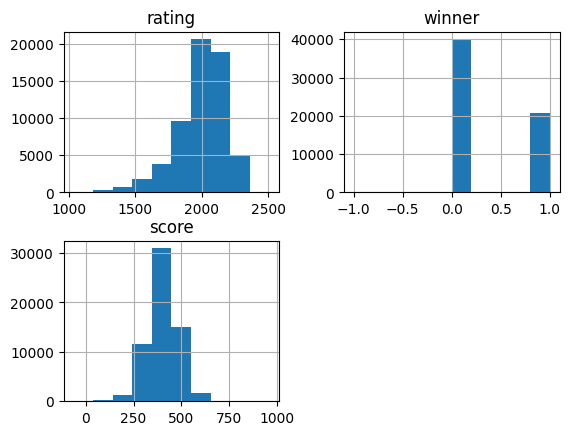

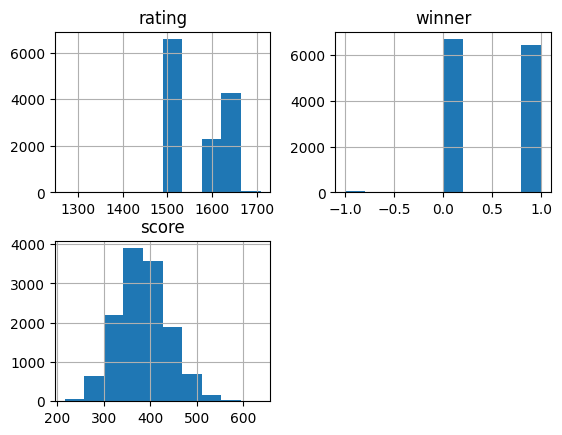

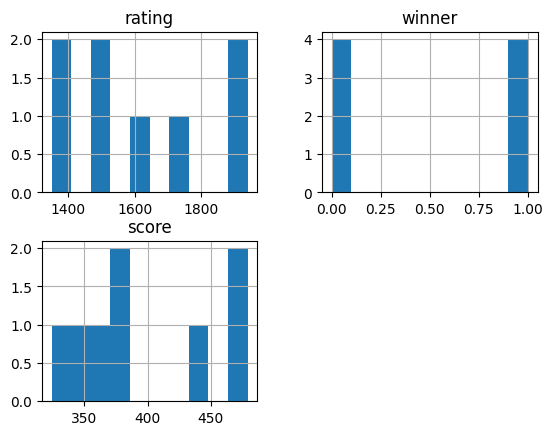

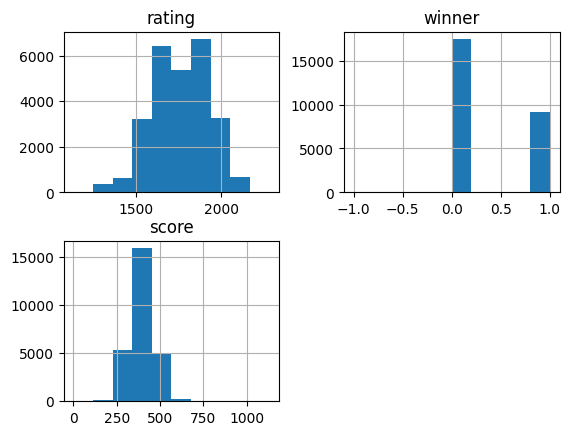

In [20]:
games_scores.groupby('lexicon').hist(column=['rating', 'winner', 'score'])

In [24]:
games_scores.groupby('rating_mode').describe()[['rating', 'winner', 'score']]

rating                                                           \
               count         mean         std     min     25%     50%     75%   
rating_mode                                                                     
CASUAL       28748.0  1726.846911  235.622930  1098.0  1500.0  1640.0  1926.0   
RATED        72072.0  1934.924589  201.662203  1033.0  1814.0  1964.0  2089.0   

                      winner            ...              score              \
                max    count      mean  ...  75%  max    count        mean   
rating_mode                             ...                                  
CASUAL       2510.0  28748.0  0.366704  ...  1.0  1.0  28748.0  389.736886   
RATED        2404.0  72072.0  0.352897  ...  1.0  1.0  72072.0  402.735459   

                                                           
                   std   min    25%    50%    75%     max  
rating_mode                                                
CASUAL       74.518995 -64.0  345.0  388.0  434.0  1132.0  
RATED        75.129260   0.0  355.0  402.0  450.0   930.0  

[2 rows x 24 columns]

rating_mode
CASUAL    [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
RATED     [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
dtype: object

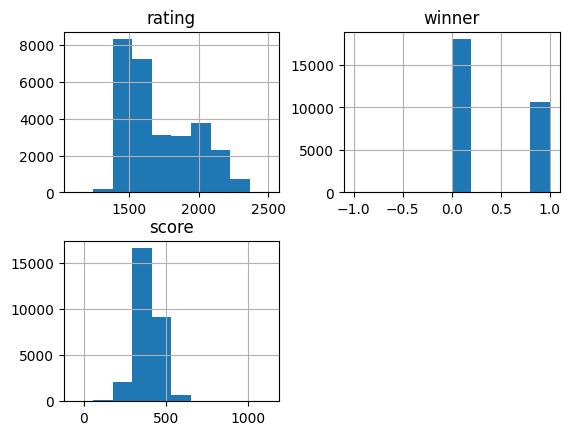

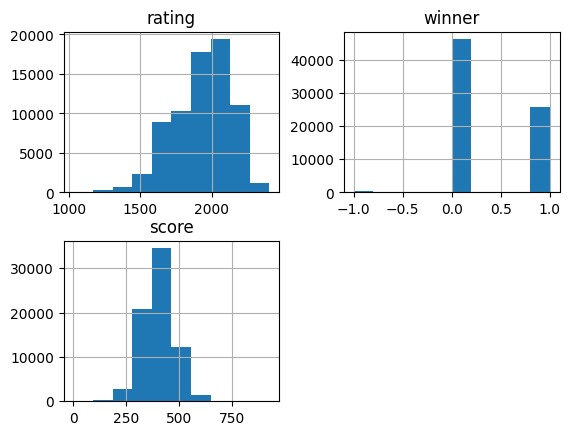

In [21]:
games_scores.groupby('rating_mode').hist(column=['rating', 'winner', 'score'])

increment_seconds
0     [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
1     [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
3     [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
5     [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
7     [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
10    [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
15    [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
30    [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
59    [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
60    [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
dtype: object

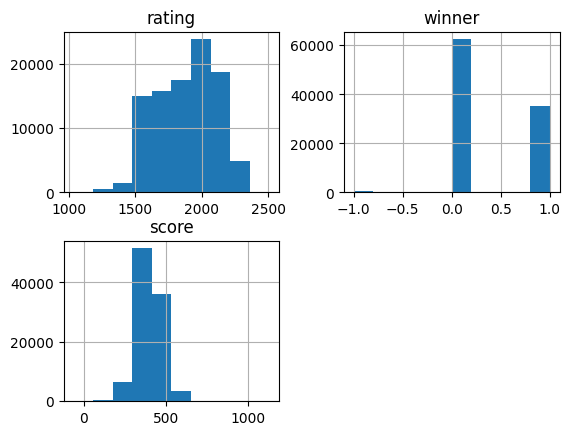

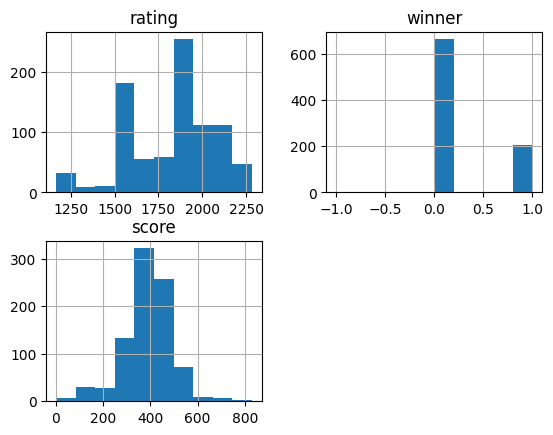

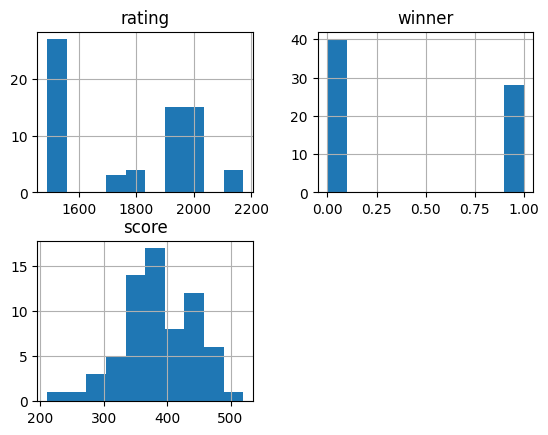

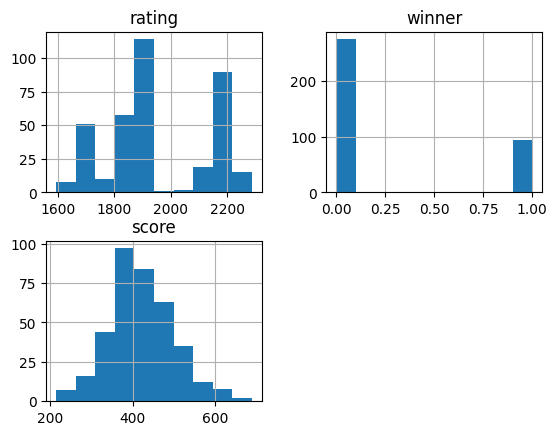

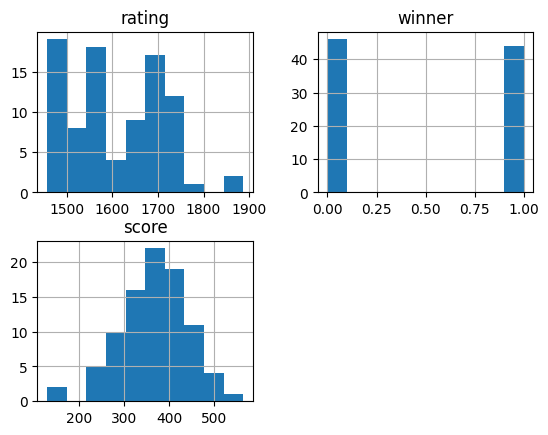

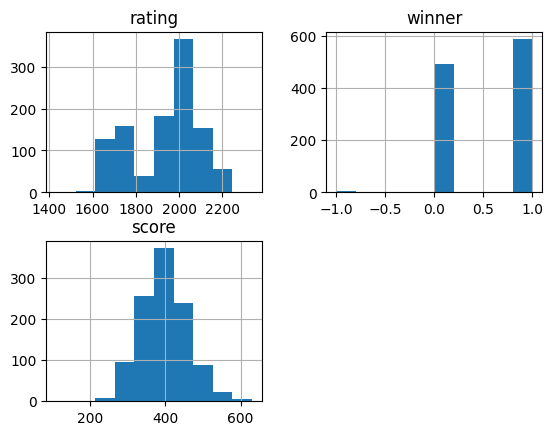

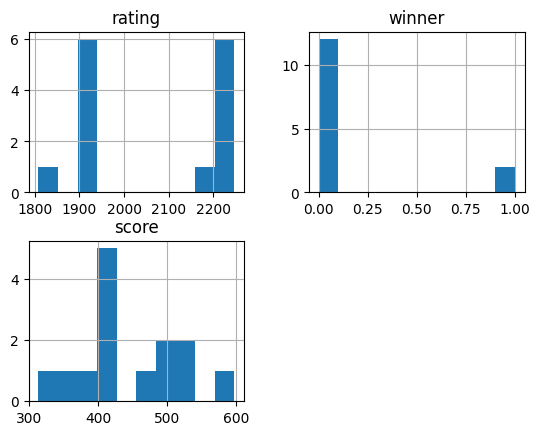

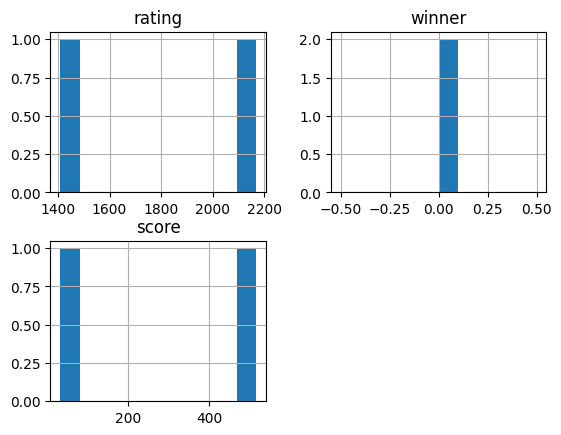

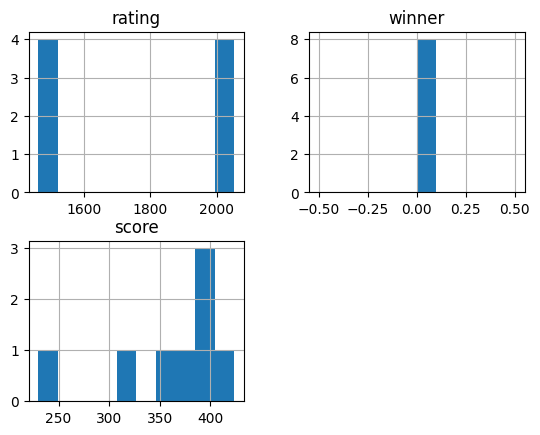

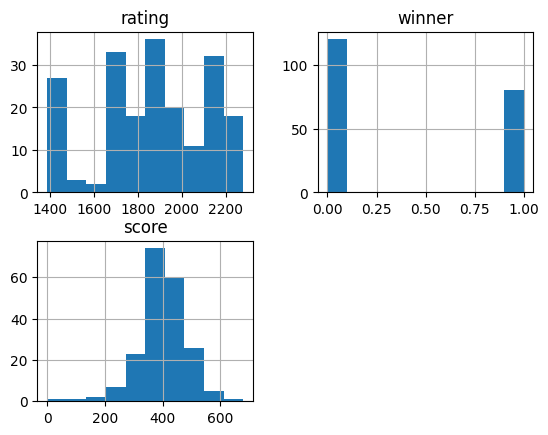

In [33]:
games_scores.groupby('increment_seconds').hist(column=['rating', 'winner', 'score'])

In [35]:
games_scores[['rating', 'game_duration_seconds', 'score', 'initial_time_seconds', 'increment_seconds']].corr()

,rating,game_duration_seconds,score,initial_time_seconds,increment_seconds
rating,1.000000,0.150011,0.425136,0.149568,0.005766
game_duration_seconds,0.150011,1.000000,0.001401,0.345675,0.100689
score,0.425136,0.001401,1.000000,0.061631,-0.001568
initial_time_seconds,0.149568,0.345675,0.061631,1.000000,0.183511
increment_seconds,0.005766,0.100689,-0.001568,0.183511,1.000000


<Axes: xlabel='initial_time_seconds', ylabel='rating'>

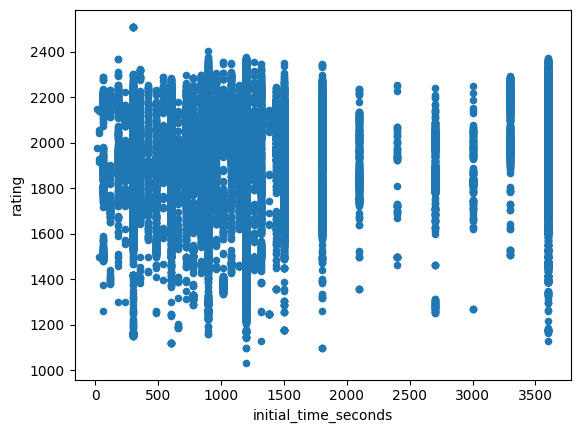

In [36]:
games_scores.plot.scatter('initial_time_seconds', 'rating')

<Axes: xlabel='score', ylabel='rating'>

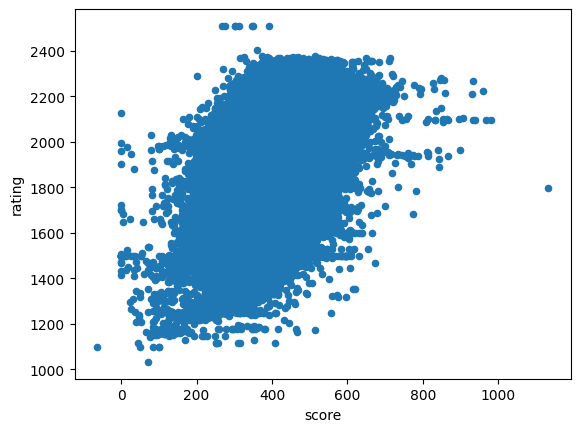

In [37]:
games_scores.plot.scatter('score', 'rating')

In [43]:
games_scores.groupby('rating_mode').corr(numeric_only=True)

winner  initial_time_seconds  \
rating_mode                                                         
CASUAL      winner                 1.000000             -0.067925   
            initial_time_seconds  -0.067925              1.000000   
            increment_seconds      0.013159              0.241127   
            max_overtime_minutes   0.193046             -0.275163   
            game_duration_seconds -0.075650              0.401136   
            score                  0.014087              0.063749   
            rating                -0.133671              0.260239   
RATED       winner                 1.000000              0.064607   
            initial_time_seconds   0.064607              1.000000   
            increment_seconds      0.016121              0.163411   
            max_overtime_minutes   0.012841              0.168175   
            game_duration_seconds -0.006748              0.326954   
            score                  0.032449              0.060766   
            rating                 0.077433              0.117543   

                                   increment_seconds  max_overtime_minutes  \
rating_mode                                                                  
CASUAL      winner                          0.013159              0.193046   
            initial_time_seconds            0.241127             -0.275163   
            increment_seconds               1.000000             -0.126002   
            max_overtime_minutes           -0.126002              1.000000   
            game_duration_seconds           0.233309             -0.438526   
            score                           0.015823             -0.059295   
            rating                          0.059803             -0.572764   
RATED       winner                          0.016121              0.012841   
            initial_time_seconds            0.163411              0.168175   
            increment_seconds               1.000000             -0.073563   
            max_overtime_minutes           -0.073563              1.000000   
            game_duration_seconds          -0.005344              0.077357   
            score                          -0.010263              0.007473   
            rating                         -0.004965              0.022306   

                                   game_duration_seconds     score    rating  
rating_mode                                                                   
CASUAL      winner                             -0.075650  0.014087 -0.133671  
            initial_time_seconds                0.401136  0.063749  0.260239  
            increment_seconds                   0.233309  0.015823  0.059803  
            max_overtime_minutes               -0.438526 -0.059295 -0.572764  
            game_duration_seconds               1.000000 -0.002163  0.244919  
            score                              -0.002163  1.000000  0.342821  
            rating                              0.244919  0.342821  1.000000  
RATED       winner                             -0.006748  0.032449  0.077433  
            initial_time_seconds                0.326954  0.060766  0.117543  
            increment_seconds                  -0.005344 -0.010263 -0.004965  
            max_overtime_minutes                0.077357  0.007473  0.022306  
            game_duration_seconds               1.000000 -0.014384  0.021250  
            score                              -0.014384  1.000000  0.474698  
            rating                              0.021250  0.474698  1.000000

In [42]:
games_scores.groupby('lexicon').corr(numeric_only=True)

winner  initial_time_seconds  \
lexicon                                                         
CSW21   winner                 1.000000              0.049112   
        initial_time_seconds   0.049112              1.000000   
        increment_seconds      0.011965              0.204325   
        max_overtime_minutes   0.004477              0.216512   
        game_duration_seconds -0.026430              0.287840   
        score                  0.047004              0.047437   
        rating                 0.105218              0.121410   
ECWL    winner                 1.000000             -0.006244   
        initial_time_seconds  -0.006244              1.000000   
        increment_seconds           NaN                   NaN   
        max_overtime_minutes   0.006244             -1.000000   
        game_duration_seconds  0.026327              0.030064   
        score                 -0.019638             -0.003812   
        rating                 0.003677             -0.030889   
NSWL20  winner                 1.000000              0.577350   
        initial_time_seconds   0.577350              1.000000   
        increment_seconds           NaN                   NaN   
        max_overtime_minutes        NaN                   NaN   
        game_duration_seconds -0.339067             -0.949631   
        score                 -0.479074              0.281812   
        rating                -0.590044             -0.252987   
NWL20   winner                 1.000000              0.046704   
        initial_time_seconds   0.046704              1.000000   
        increment_seconds      0.032108              0.141338   
        max_overtime_minutes  -0.010888              0.206397   
        game_duration_seconds  0.061689              0.346381   
        score                  0.023930              0.081697   
        rating                 0.027634              0.213700   

                               increment_seconds  max_overtime_minutes  \
lexicon                                                                  
CSW21   winner                          0.011965              0.004477   
        initial_time_seconds            0.204325              0.216512   
        increment_seconds               1.000000             -0.075191   
        max_overtime_minutes           -0.075191              1.000000   
        game_duration_seconds           0.067759              0.029492   
        score                           0.000052              0.000734   
        rating                         -0.001140              0.025436   
ECWL    winner                               NaN              0.006244   
        initial_time_seconds                 NaN             -1.000000   
        increment_seconds                    NaN                   NaN   
        max_overtime_minutes                 NaN              1.000000   
        game_duration_seconds                NaN             -0.030064   
        score                                NaN              0.003812   
        rating                               NaN              0.030889   
NSWL20  winner                               NaN                   NaN   
        initial_time_seconds                 NaN                   NaN   
        increment_seconds                    NaN                   NaN   
        max_overtime_minutes                 NaN                   NaN   
        game_duration_seconds                NaN                   NaN   
        score                                NaN                   NaN   
        rating                               NaN                   NaN   
NWL20   winner                          0.032108             -0.010888   
        initial_time_seconds            0.141338              0.206397   
        increment_seconds               1.000000             -0.074791   
        max_overtime_minutes           -0.074791              1.000000   
        game_duration_seconds           0.137943              0.199916   
        sc